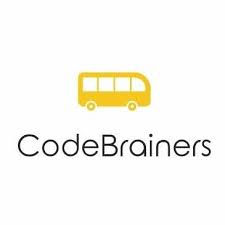

# SQL - Interfejs Pythona dla baz danych SQLite

_Mikołaj Leszczuk_

* Interfejs sqlite3
* Zadania utrwalające
* Materiały dodatkowe

## Interfejs sqlite3

Interfejs sqlite3 to biblioteka C, która zapewnia lekką dyskową bazę danych, która nie wymaga oddzielnego procesu serwera i umożliwia dostęp do bazy danych przy użyciu niestandardowego wariantu języka zapytań SQL. Niektóre aplikacje mogą używać sqlite3 do wewnętrznego przechowywania danych. Możliwe jest również prototypowanie aplikacji przy użyciu sqlite3, a następnie przeniesienie kodu do większej bazy danych, takiej jak PostgreSQL lub Oracle.

Moduł sqlite3 został napisany przez Gerharda Häringa. Zapewnia interfejs SQL zgodny ze specyfikacją DB-API 2.0 opisaną w [PEP 249](https://www.python.org/dev/peps/pep-0249).

Aby użyć modułu, musisz najpierw utworzyć obiekt [`Connection`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection), który reprezentuje bazę danych. Tutaj dane zostaną zapisane w pliku `example.db`:

In [9]:
import os
os.remove('example.db')

In [10]:
import sqlite3
conn = sqlite3.connect('example.db')

Możesz również podać specjalną nazwę `:memory:` aby utworzyć bazę danych w pamięci RAM.

Gdy masz już połączenie ([`Connection`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Connection)), możesz utworzyć obiekt [Cursor](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor) i wywołać jego metodę [execute()](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.execute) w celu wykonania poleceń SQL:

In [11]:
c = conn.cursor()

Utwórz tabelę:

In [12]:
c.execute('''CREATE TABLE stocks
             (date text, trans text, symbol text, qty real, price real)''')

Wstaw wiersz danych:

In [13]:
c.execute("INSERT INTO stocks VALUES ('2006-01-05','BUY','RHAT',100,35.14)")

Zapisz (zatwierdź, ang. _commit_) zmiany:

In [14]:
conn.commit()

Możemy również zamknąć połączenie, jeśli skończymy.

Tylko upewnij się, że wszelkie zmiany zostały wprowadzone, w przeciwnym razie zostaną utracone:

In [15]:
conn.close()

Zapisane dane są trwałe i są dostępne w kolejnych sesjach:

In [17]:
import sqlite3
conn = sqlite3.connect('example.db')
c = conn.cursor()

Nigdy tego nie rób (niepewne!):

In [18]:
symbol = 'RHAT'
c.execute("SELECT * FROM stocks WHERE symbol = '%s'" % symbol)

Zrób to zamiast tego:

In [19]:
t = ('RHAT',)
c.execute('SELECT * FROM stocks WHERE symbol=?', t)
print(c.fetchone())

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)


Większy przykład, który wstawia wiele rekordów naraz:

In [20]:
purchases = [('2006-03-28', 'BUY', 'IBM', 1000, 45.00),
             ('2006-04-05', 'BUY', 'MSFT', 1000, 72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, 53.00),
            ]
c.executemany('INSERT INTO stocks VALUES (?,?,?,?,?)', purchases)

Aby pobrać dane po wykonaniu instrukcji SELECT, możesz traktować kursor jako [iterator](https://docs.python.org/3/glossary.html#term-iterator), wywołać metodę [`fetchone()`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchone) kursora w celu pobrania pojedynczego pasującego wiersza lub wywołać funkcję [`fetchall()`](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.fetchall) w celu uzyskania listy pasujących wierszy.

W tym przykładzie zastosowano formę iteratora:

In [21]:
for row in c.execute('SELECT * FROM stocks ORDER BY price'):
    print(row)

('2006-01-05', 'BUY', 'RHAT', 100.0, 35.14)
('2006-03-28', 'BUY', 'IBM', 1000.0, 45.0)
('2006-04-06', 'SELL', 'IBM', 500.0, 53.0)
('2006-04-05', 'BUY', 'MSFT', 1000.0, 72.0)


## Zadania utrwalające

Python i baza danych SQLite - ćwiczenia i praktyka

### Utwórz połączenie bazy danych SQLite z bazą danych znajdującą się w pamięci

Napisz program w języku Python, aby utworzyć połączenie bazy danych SQLite z bazą danych znajdującą się w pamięci.

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [59]:
import sqlite3
conn = sqlite3.connect(':memory:')
print("Baza danych pamięci utworzona i połączona z SQLite.")
conn.close()
print("Połączenie SQLite jest zamknięte.")

Baza danych pamięci utworzona i połączona z SQLite.
Połączenie SQLite jest zamknięte.


### Utwórz bazę danych SQLite i połącz się z bazą danych oraz wydrukuj wersje

Napisz program w Pythonie, aby utworzyć bazę danych SQLite w pliku i połączyć się z bazą danych oraz wydrukować wersję bazy danych SQLite i numer wersji modułu sqlite3 w postaci ciągu.

Podpowiedzi:
* Funkcja SQLite **sqlite_version()** zwraca ciąg znaków wersji dla uruchomionej biblioteki SQLite.
* Funkcja Pythona `sqlite3.`**`version`** zwraca numer wersji modułu sqlite3 w postaci ciągu. To nie jest wersja biblioteki SQLite!

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [56]:
import sqlite3
conn = sqlite3.connect('temp.db')
c = conn.cursor()
print("Baza danych stworzona i połączona z SQLite.")
query = "SELECT sqlite_version();"
c.execute(query)
record = c.fetchall()
print("Wersja bazy danych SQLite to: ", record)
print("Wersja modułu sqlite3 to: ", sqlite3.version)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Baza danych stworzona i połączona z SQLite.
Wersja bazy danych SQLite to:  [('3.33.0',)]
Wersja modułu sqlite3 to:  2.6.0
Połączenie SQLite jest zamknięte.


### Utwórz bazę danych SQLite, połącz się z bazą danych oraz zabezpiecz się przed wyjątkami

Napisz program w Pythonie, aby utworzyć bazę danych SQLite i połączyć się z bazą danych oraz zabezpieczyć się przed wyjątkami. Wywołaj sztucznie wyjątek, wykonując błędne zapytanie.

Podpowiedź: _wyjątek_ `sqlite3.`**`Error`** jest to klasa bazowa pozostałych wyjątków w module sqlite3. Jest to zarazem podklasa [`Exception`](https://docs.python.org/3/library/exceptions.html#Exception).

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [60]:
import sqlite3
try:
    conn = sqlite3.connect(':memory:')
    c = conn.cursor()
    print("Baza danych stworzona i połączona z SQLite.")
    # c.execute("SELECT * FROM users;")
except sqlite3.Error as error:
    print("Błąd podczas łączenia się z SQLite", error)
finally:
    conn.close()
    print("Połączenie SQLite jest zamknięte.")

Baza danych stworzona i połączona z SQLite.
Połączenie SQLite jest zamknięte.


### Utwórz tabelę w bazie danych SQLite

Napisz program w Pythonie, aby połączyć bazę danych SQLite, utworzyć tabelę w bazie danych, dodać jeden wiersz i go wyświetlić z bazdy danych.

Struktura tabeli `Users`:

```sqlite
login VARCHAR(8) NOT NULL
name VARCHAR(40) NOT NULL
phone_no VARCHAR(15)
```

---

**Kod Pythona (przykładowe rozwiązanie i przykładowe dane wyjściowe):**

In [69]:
import sqlite3
conn = sqlite3.connect(':memory:')
c = conn.cursor()
c.execute("CREATE TABLE users(login VARCHAR(8) NOT NULL, name VARCHAR(40) NOT NULL, phone_no VARCHAR(15));")
print("Utworzono tabelę Users.")
c.execute("INSERT INTO users VALUES ('user', 'Jan Nowak', '1234567890');")
c.execute("SELECT * FROM users;")
record = c.fetchall()
print(record)
conn.close()
print("Połączenie SQLite jest zamknięte.")

Utworzono tabelę Users.
[('user', 'Jan Nowak', '1234567890')]
Połączenie SQLite jest zamknięte.


## Materiały dodatkowe

* [SQL e-learning](http://zasoby.open.agh.edu.pl/~11smdrobniak/)
* [Podstawy baz danych z encyklopedią SQL](http://zasoby.open.agh.edu.pl/~09seenglert/)
* [MySQL - podstawy](http://www.galaxy.agh.edu.pl/~pamalino/programowanie/mysql/)
* [SQL](https://github.com/pkociepka/sql)